## Observations and Insights 

In [36]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "resources/Mouse_metadata.csv"
study_results_path = "resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, how='outer')

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [37]:
# Checking the number of mice.
mice = combined_data['Mouse ID'].value_counts()
mice_total=len(mice)
mice_total

249

In [38]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupe_mice = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()

In [39]:
# Optional: Get all the data for the duplicate mouse ID. 
dupe_mice_id = pd.DataFrame(dupe_mice)
dupe_mice_id

,0
0,g989


In [40]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
scrubbed_df = combined_data[combined_data['Mouse ID'].isin(dupe_mice)==False]

In [41]:
# Checking the number of mice in the clean DataFrame.
clean_mice=scrubbed_df["Mouse ID"].value_counts()
clean_number_of_mice=len(clean_mice)
clean_number_of_mice

248

## Summary Statistics

In [42]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drugregimen_mean = scrubbed_df.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
drugregimen_mean

drugregimen_median = scrubbed_df.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
drugregimen_median

drugregimen_variance = scrubbed_df.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
drugregimen_variance

drugregimen_standard_deviation = scrubbed_df.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
drugregimen_standard_deviation

drugregimen_SEM = scrubbed_df.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]
drugregimen_SEM

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [43]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

summary_table = pd.DataFrame({"Mean": drugregimen_mean, "Median": drugregimen_median, "Variance":drugregimen_variance, "Standard Deviation": drugregimen_standard_deviation, "SEM": drugregimen_SEM})
summary_table

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [44]:
# Using the aggregation method, produce the same summary statistics in a single line

single_line_group = scrubbed_df.groupby('Drug Regimen')
summary_table_2 = single_line_group.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
summary_table_2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

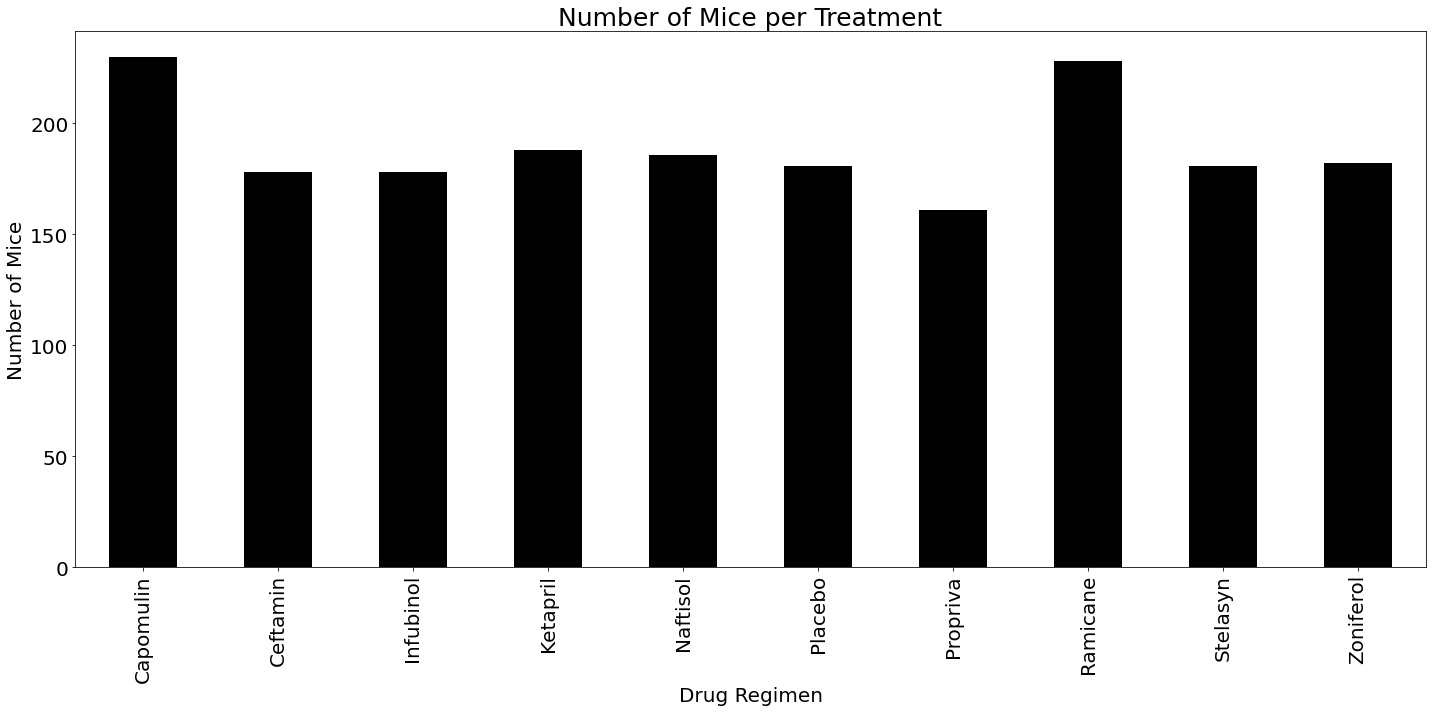

In [45]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mice_per_treatment = combined_data.groupby(["Drug Regimen"]).count()["Mouse ID"] 

plot_pandas = mice_per_treatment.plot.bar(figsize=(20,10), color='k',fontsize = 20)
mice_per_treatment
plt.xlabel("Drug Regimen",fontsize = 20)
plt.ylabel("Number of Mice",fontsize = 20)
plt.title("Number of Mice per Treatment",fontsize = 25)


plt.tight_layout()
plt.show()


In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.



In [47]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

groupby_mouse_gender = combined_data.groupby(["Mouse ID","Sex"])
groupby_mouse_gender
mouse_gender_df = pd.DataFrame(groupby_mouse_gender.size())

mouse_gender = pd.DataFrame(mouse_gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Mice Count"]

mouse_gender["Percentage"] = (100*(mouse_gender["Total Mice Count"]/mouse_gender["Total Mice Count"].sum()))

mouse_gender


,Total Mice Count,Percentage
Sex,,
Female,124,49.799197
Male,125,50.200803


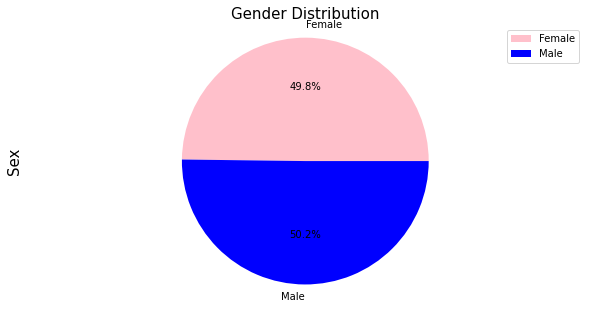

In [48]:
colors = ['pink', 'blue']
plot = mouse_gender.plot.pie(y='Total Mice Count',figsize=(10,5), colors = colors, autopct="%1.1f%%")

plt.title('Gender Distribution',fontsize = 15)
plt.ylabel('Sex',fontsize = 15)
plt.axis("equal")


plt.show()

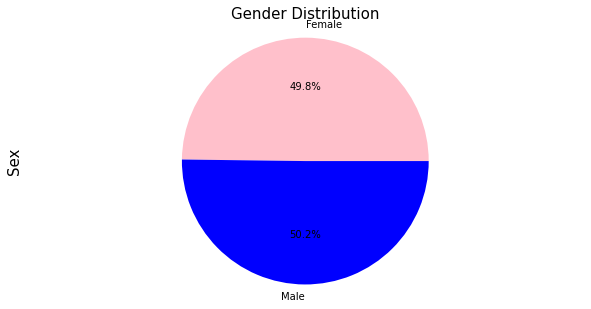

In [49]:
 # Generate a pie plot showing the distribution of female versus male mice using pyplot
    
labels = ["Female","Male"]
sizes = [49.799197,50.200803]
colors = ['pink', 'blue']
fig1, ax1 = plt.subplots(figsize=(10, 5))
plt.pie(sizes,labels=labels, colors=colors, autopct="%1.1f%%")
plt.title('Gender Distribution',fontsize = 15)
plt.ylabel('Sex',fontsize = 15)

plt.axis("equal")

plt.show()



## Quartiles, Outliers and Boxplots

In [50]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

drug_list=scrubbed_df[scrubbed_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = drug_list.groupby('Mouse ID').max()['Timepoint']
max_timepoint.reset_index().head()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a275,45
3,a411,45
4,a444,45


In [51]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_vol = pd.merge(max_timepoint, scrubbed_df, how="left", on =["Mouse ID", "Timepoint"])
tumor_vol.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0


In [52]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in drug_list:
    drug_tumor_vol = tumor_vol['Tumor Volume (mm3)'].loc[tumor_vol['Drug Regimen'] == drug]
    
    # add subset 
    vol_data.append(drug_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = drug_tumor_vol.quantile([.25,.5,.75])
    lowerq = (quartiles[0.25]).round()
    upperq = (quartiles[0.75]).round()
    iqr = (upperq-lowerq).round()
    print(f'For {drug}, Interquartile Range (IQR) is {iqr}.')
   
    lower_bound = (lowerq - (1.5*iqr))
    upper_bound = (upperq + (1.5*iqr))
    print(f'For {drug}, values below {lower_bound} is considered an outlier.')
    print(f'For {drug}, values above {upper_bound}  is considered an outlier.\n')

For Capomulin, Interquartile Range (IQR) is 8.0.
For Capomulin, values below 20.0 is considered an outlier.
For Capomulin, values above 52.0  is considered an outlier.

For Ramicane, Interquartile Range (IQR) is 9.0.
For Ramicane, values below 18.5 is considered an outlier.
For Ramicane, values above 54.5  is considered an outlier.

For Infubinol, Interquartile Range (IQR) is 12.0.
For Infubinol, values below 36.0 is considered an outlier.
For Infubinol, values above 84.0  is considered an outlier.

For Ceftamin, Interquartile Range (IQR) is 15.0.
For Ceftamin, values below 26.5 is considered an outlier.
For Ceftamin, values above 86.5  is considered an outlier.



<ipython-input-53-e4f7d06461dd>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(drug_list)


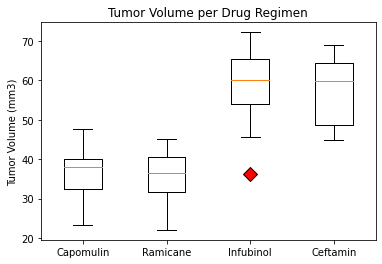

In [53]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# Format the outliers 
diamond = dict(markerfacecolor='r', marker='D', markersize=10)
# Plot
fig, ax = plt.subplots()
ax.set_title('Tumor Volume per Drug Regimen')
ax.set_xticklabels(drug_list)
ax.set_ylabel('Tumor Volume (mm3)')
ax.boxplot(vol_data, flierprops = diamond)
plt.show()


## Line and Scatter Plots

In [54]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

candidate = scrubbed_df.loc[scrubbed_df["Drug Regimen"] == "Capomulin"]  
candidate.sample()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
357,g316,Capomulin,Female,22,22,30,44.22148,2


In [55]:
mouse_g316 = scrubbed_df[['Timepoint', 'Tumor Volume (mm3)']] \
            .loc[(scrubbed_df['Drug Regimen'] == 'Capomulin') & (scrubbed_df['Mouse ID']=='g316')]
mouse_g316

,Timepoint,Tumor Volume (mm3)
351,0,45.000000
352,5,44.022752
353,10,44.502042
354,15,45.216743
355,20,45.933322
356,25,46.809225
357,30,44.221480
358,35,44.702833
359,40,45.565821
360,45,40.159220


Text(0.5, 0, 'Timepoint')

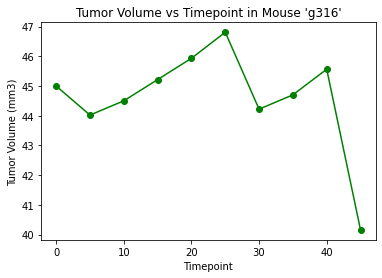

In [56]:
plt.plot(mouse_g316['Timepoint'], mouse_g316['Tumor Volume (mm3)'], color="green", marker='o')
plt.title("Tumor Volume vs Timepoint in Mouse 'g316'")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint")

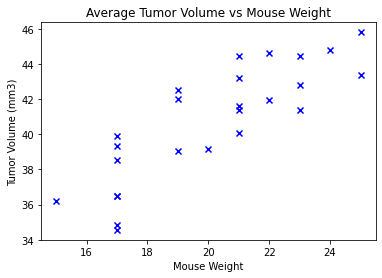

In [57]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

weight = scrubbed_df.loc[scrubbed_df['Drug Regimen'] == 'Capomulin']
avg_vol = weight.groupby(["Mouse ID"]).mean()

plt.scatter(avg_vol["Weight (g)"],avg_vol["Tumor Volume (mm3)"], color="blue", marker='x') 
plt.xlabel("Mouse Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Average Tumor Volume vs Mouse Weight")
plt.show()

## Correlation and Regression

In [33]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = round(st.pearsonr(avg_vol['Weight (g)'],avg_vol['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between Mouse Weight (g) and Average Tumor Volume is {round(correlation,2)}.")

The correlation between Mouse Weight (g) and Average Tumor Volume is 0.84.


In [58]:
# Plot the linear regression model on top of the previous scatter plot.
linear_regression = st.linregress(avg_vol['Weight (g)'],avg_vol['Tumor Volume (mm3)'])
linear_regression

LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134, intercept_stderr=2.590987686768349)

In [59]:
slope = 0.9544396890241045
intercept = 21.552160532685015

In [60]:
regression_values = avg_vol['Weight (g)'] * slope + intercept
regression_values.head()

Mouse ID
b128    42.549834
b742    41.595394
f966    37.777635
g288    39.686515
g316    42.549834
Name: Weight (g), dtype: float64

In [61]:
# Generate Linear Equation 
line_eq = "y = " + str(round(slope,2)) + " x +" + str(round(intercept,2))
print(f'The linear regression equation is {line_eq}.')

The linear regression equation is y = 0.95 x +21.55.


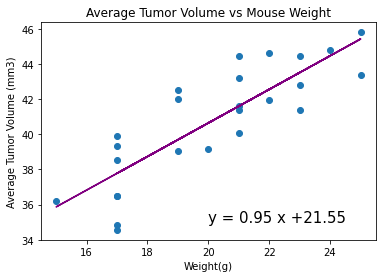

In [68]:
# Generate the plot 
plt.scatter(avg_vol['Weight (g)'],avg_vol['Tumor Volume (mm3)'])
plt.plot(avg_vol['Weight (g)'], regression_values, "-r", color='purple')
plt.annotate(line_eq,(20,35), color='black', fontsize=15)
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title("Average Tumor Volume vs Mouse Weight")
plt.show()